# Palmer Penguins

***

The Palmer penguins dataset by Allison Horst, Alison Hill, and Dr. Kristen Gorman contains a number of measurements for three different species of penguins located in the Palmer Archipelago, Antartica. Dr. Kristen Gorman gathered the data between 2007 and 2009 with the Palmer Station Long Term Ecological Research Program. More information about the dataset and its official documentation is available [here](https://allisonhorst.github.io/palmerpenguins/index.html).

This is my analaysis of the Palmer penguins dataset using python.

<div>
<img src="https://www.frontiersin.org/files/Articles/526092/fmars-08-526092-HTML/image_m/fmars-08-526092-g001.jpg" alt="Palmer Station, Antartica" style="width:400px;"/>
</div>

*Palmer Station, Antartica.*

## Import the Python Modules

I have used python along with the python modules [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/pyplot.html) and [seaborn](https://seaborn.pydata.org/index.html) to analyse and plot the data.

In [2]:
# Let's import the python modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data
The dataset I am using for my analysis is sourced from [Michael Waskom's seaborn-data repository on GitHub](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv).

In [3]:
# Let's load the penguins dataset using pandas.
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## First Look at the Data

Let's take a look at the first five rows of the dataset to ensure it has loaded into the notebook.

In [4]:
# Let's take a look at the dataset.
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Now that the data is loaded, let's take a look at the shape of the dataset and variables contained within.

We can see below that the dataset consists of 344 rows and 7 columns. Each row representing an individual penguin and each column representing a different variable.

The variables include species, island and sex; bill length, bill depth and flipper length, each measured in millimetres; and body mass, measured in grams.

In [5]:
# The shape of the dataset.
print(f"Rows, Columns: {penguins.shape}")

# The variables of the dataset.
print(f"\nVariables:")
for column in penguins.columns:
    print(column)

Rows, Columns: (344, 7)

Variables:
species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex


## Data Types

Each variable can store data of different  types, and the different types will inform how the data can be analysed and visualised.

The three categorical variables, species, island and sex all contain text values and these are stored as data type object. The four numerical variables all contain floating point numbers and these are stored at data type float64. The penguins data set has the data type object, as it contains of different types data.

Now that we know the data types of the variables we can further explore the data.

In [6]:
# Let's take a look at the data types.
print(f"\n\nVariables:\t  Data Type:\n{penguins.dtypes}")



Variables:	  Data Type:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


First, let's take a look at the categorical variables. It will be useful to see what data is contained within these.

If we get the unique values of each variable, we can see that there are three species, Adelie, Chinstrap and Gentoo; and three islands, Torgersen, Biscoe and Dream; and sex contains male, female and nan. NAN represents null or missing data.

<div>
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="The Palmer Archipelago penguins. Artwork by @allison_horst." style="width:400px;"/>
</div>

*The Palmer Archipelago penguins. Artwork by @allison_horst.*

In [7]:
# Let's take a look at the unique data in each variable.
species_names = penguins['species'].unique()
island_names = penguins['island'].unique()
sex_values = penguins['sex'].unique()

# Show.
print(f"Species:\t{species_names}\nIsland:\t\t{island_names}\nSex:\t\t{sex_values}")

Species:	['Adelie' 'Chinstrap' 'Gentoo']
Island:		['Torgersen' 'Biscoe' 'Dream']
Sex:		['MALE' 'FEMALE' nan]


Getting the value counts of these variables is also a useful endeavour. For example, we can see below that the Adelie species is the most observed in the dataset with data collected for 152 Adelie penguins. The below also shows that the counts are stored as integers in the data type int64.

In [8]:
# Count the number of penguins in each varialbe.
species_count = penguins['species'].value_counts()
island_count = penguins['island'].value_counts()
sex_count = penguins['sex'].value_counts()

# Show.
print(f"{species_count}\n\n{island_count}\n\n{sex_count}")

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


Next, let's take a look at the numerical values. It will be useful to see the average measurements of the penguins along with some other descriptive statistics.

For example, below I can see the average bill length is 43.92193 millimetres, the minimum flipper length is 172 millimetres, and the maximum body mass is 6300 grams.

In [9]:
# Describe the dataset.
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


All the above data is insightful. However, if we plot the data, it will allow for easy comparison and visualisation of the different variables.

## Bar Charts

According to [a complete guide to bar charts](https://www.atlassian.com/data/charts/bar-chart-complete-guide), bar charts can be used to plot the numeric values of variables as bars. Each variable is represented with a bar, and the length of the bar reflects the variable's value. Bar charts allow for easy comparison of variables.

First, let's create a bar chart using matplotlib.plt to summarize and compare the counts of species per island in the penguin's dataset.

Taking a look at the bar chart below, I can quickly see that the Adelie species was the only species to be observed across all three islands in the dataset, and that Torgersen Island had only one species of penguin.

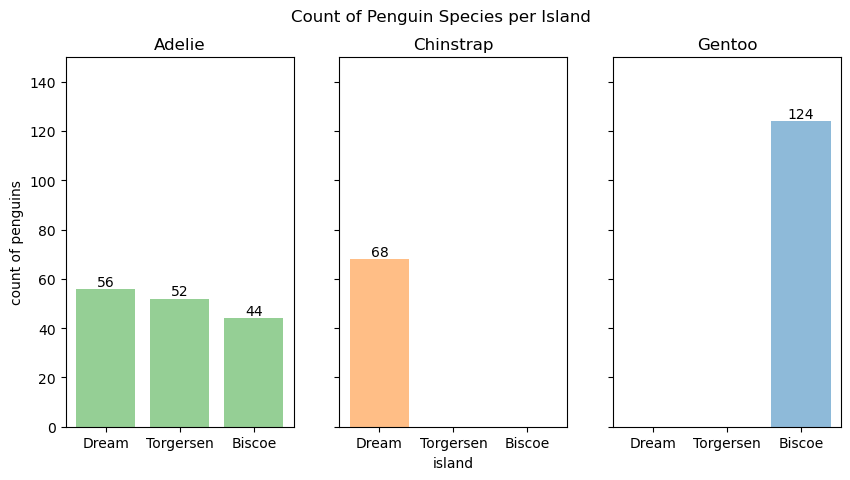

In [10]:
# First let's get the count of each penguin species per island.
adelie_count = penguins[penguins['species'] == "Adelie"]['island'].value_counts()
chinstrap_count = penguins[penguins['species'] == "Chinstrap"]['island'].value_counts()
gentoo_count = penguins[penguins['species'] == "Gentoo"]['island'].value_counts()

# Now let's use subplots to include the plot of each count in one figure.
# Adapted from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html#creating-multiple-subplots-using-plt-subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)

# Select the plot type, x & y axis, and bar colour.
plot1 = ax1.bar(adelie_count.index, adelie_count, color='tab:green', alpha=0.5)

# Set y axis label, title, y axix limits.
ax1.set_ylabel("count of penguins")
ax1.set_title("Adelie")
ax1.set_ylim(0,150)

# Add count to bar labels. 
# Adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#bar-label-demo.
ax1.bar_label(plot1)

# Select the plot type, x & y axis, and bar colour.
plot2 = ax2.bar(chinstrap_count.index, chinstrap_count, color='tab:orange', alpha=0.5)

# Set x axis label, title, bar label.
ax2.set_xlabel("island")
ax2.set_title("Chinstrap")
ax2.bar_label(plot2)

# Select the plot type, x & y axis, and bar colour.
plot3 = ax3.bar(gentoo_count.index, gentoo_count, color='tab:blue', alpha=0.5)

# Set the title, bar label.
ax3.set_title("Gentoo")
ax3.bar_label(plot3)

# Format figure & add title.
fig.set_figwidth(10)
fig.align_xlabels()
fig.suptitle("Count of Penguin Species per Island")

# Show the bar chart.
plt.show()

Next, let's create a bar chart to compare the average body mass of each species.

Taking a look at the chart below, we can see that Gentoo species of penguin has the highest average body mass.

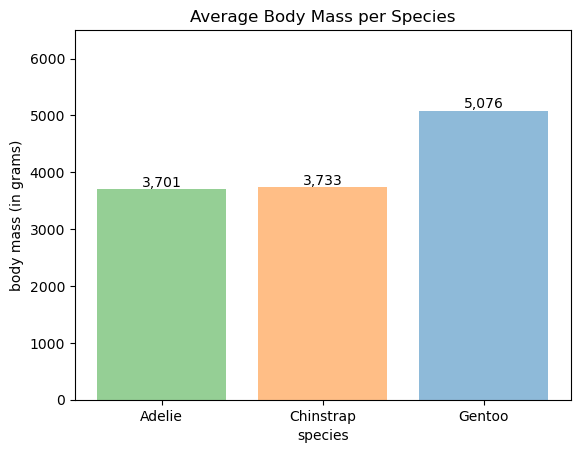

In [11]:
# First let's get the mean body mass per species.
body_mass_species = penguins.groupby(['species'])['body_mass_g'].mean()

# Set the colours for each species.
colours = ['tab:green', 'tab:orange', 'tab:blue']

# Use subplots to create the bar chart.
fig, ax = plt.subplots()

# Select the plot type, x & y axis, and bar colours.
body_mass_species_plot = ax.bar(body_mass_species.index, body_mass_species, color=colours, alpha=0.5)

# Set the axis labels, title, y axis limits and bar labels.
ax.set_xlabel("species")
ax.set_ylabel("body mass (in grams)")
ax.set_title("Average Body Mass per Species")
ax.set_ylim(0,6500)
ax.bar_label(body_mass_species_plot, fmt='{:,.0f}')

# Show the bar chart.
plt.show()

## Histograms

Histograms can be used to plot the distribution of a variable's values as a series of bars, according to [a complete guide to histograms](https://www.atlassian.com/data/charts/histogram-complete-guide). Each bar is called a bin, and the height of the bin represents the frequency of data points within each interval.

Let's plot the penguin flipper lengths using a histogram.

Taking a look at the histogram, the flipper lengths appear to have a normal distrubion across each species. The highest frequencies appear to fall between 185mm and 195mm for the Adelie species, between 190mm and 200mm for the Chinstrap species, and between 210mm and 220mm for the Gentoo species.

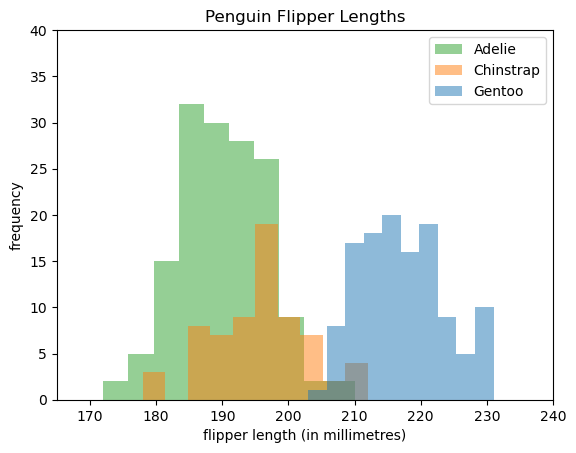

In [12]:
# First let's get the flipper length per species and convert each to a numpy array.
flipper_length_adelie = penguins[penguins['species'] == "Adelie"]['flipper_length_mm'].to_numpy()
flipper_length_chinstrap = penguins[penguins['species'] == "Chinstrap"]['flipper_length_mm'].to_numpy()
flipper_length_gentoo = penguins[penguins['species'] == "Gentoo"]['flipper_length_mm'].to_numpy()

# Use subplots to create the histogram.
fig, ax = plt.subplots()

# Select the plot type, legend label, bar colour, transparency, number of bins.
ax.hist(flipper_length_adelie, label='Adelie', color='tab:green', alpha=0.5, bins=10)
ax.hist(flipper_length_chinstrap, label='Chinstrap', color='tab:orange', alpha=0.5, bins=10)
ax.hist(flipper_length_gentoo, label='Gentoo', color='tab:blue', alpha=0.5, bins=10)

# Set the axis labels, axis limits, title.
ax.set_xlabel('flipper length (in millimetres)')
ax.set_ylabel('frequency')
ax.set_xlim(165,240)
ax.set_ylim(0,40)
ax.set_title('Penguin Flipper Lengths')

# Add legend.
ax.legend()

# Show the histogram.
plt.show()

## Two Variable Plots and Correlation

Now let's select two variables from the dataset and invesigate the correlation between them.

Correlation is the relationship between two variables and the correlation coefficient measures the strength of the relationship. According to [Investopedia's definition](https://www.investopedia.com/terms/p/pearsoncoefficient.asp), the correlation coefficient ranges from minus one to plus one. Positive correlations indicate that both variables move in the same direction, while negative correlations indicate that as one variable increases, the other decreases.

Placing two variables on a scatter plot is an effective way to visualise their correlation. A scatter plot that resembles a straight line indicates a linear relationship between the variables. A quick way to do this is to use [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to plot each combination of variables.

c:\Users\eogha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


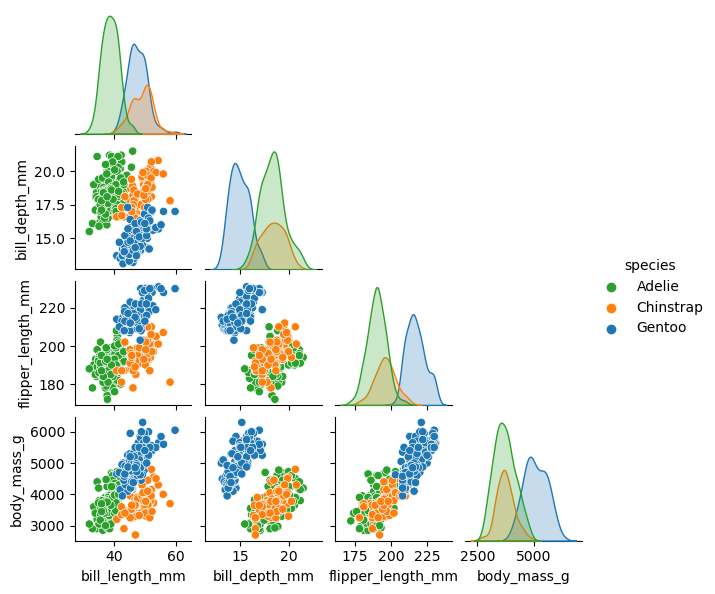

In [13]:
# Let's plot all the variables.
# Adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot.
sns.pairplot(penguins, corner=True, hue='species', palette={'Adelie':'tab:green', 'Chinstrap':'tab:orange', 'Gentoo':'tab:blue'}, height=1.5)

Looking at the plots above, body mass and flipper length appear to have a strong linear relationship. Let's investigate the correlation between these two variables further.

### Flipper Length and Body Mass

Let's create a scatter plot usign matplotlib.plt with flipper length on the x axis and body mass on the y axis, and also measure the correlation using numpy.

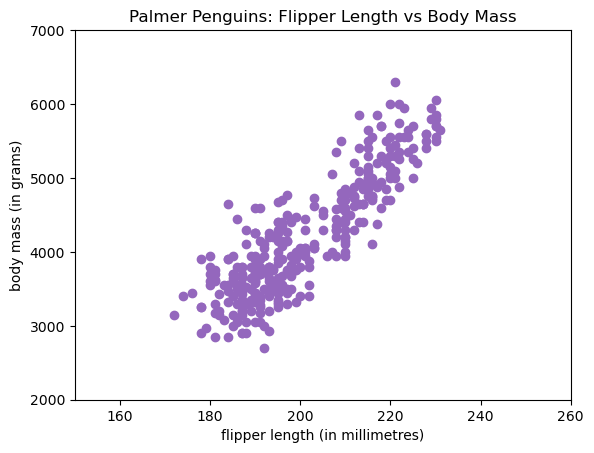

Correlation Coefficient: [0.87120177]


In [21]:
# Let's get the numpy array of each variable
flipper_length = penguins["flipper_length_mm"].to_numpy()
body_mass = penguins["body_mass_g"].to_numpy()

# Use subplots to create the plot.
fig, ax = plt.subplots()

# Select x and y variables, marker shape, colour.
ax.plot(flipper_length, body_mass, "o", color='tab:purple')

# Set axis labels, limits and title.
ax.set_xlabel('flipper length (in millimetres)')
ax.set_ylabel('body mass (in grams)')
ax.set_xlim(150, 260)
ax.set_ylim(2000, 7000)
ax.set_title('Palmer Penguins: Flipper Length vs Body Mass')

# Show.
plt.show()

# Let's measure the correlation coefficient.
# I will need to remove any nan values from the numpy array.
# Adapted from https://www.statology.org/numpy-remove-nan/.
x = flipper_length[~np.isnan(flipper_length)]
y = body_mass[~np.isnan(body_mass)]

# Calculate the coefficient.
corr = np.corrcoef(x, y)

# Print.
print(f"Correlation Coefficient: {corr[0,1:]}")


Looking at the scatter plot above we can see clearly see that as body mass increases, flipper length also tend to increase. The correlation coefficient of 0.87120177 also indicates a fairly strong positive relationship between the variables.

***

### End